<a href="https://colab.research.google.com/github/vedanttule134/Airline-Passenger-Referral-Prediction/blob/main/Airline_Passenger_Referral_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Airline Passenger Referral Prediction



##### **Project Type**    - Classification
##### **Contribution**    - Team (Team Data Warehouse)
##### **Team Member 1 -** Vedant Tule
##### **Team Member 2 -** Lovpreet Singh
##### **Team Member 3 -**
##### **Team Member 4 -**

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Data includes airlines reviews from 2006 to 2019 for popular airlines around the world with multiple choice and free text questions. Data is scraped in spring 2019. The main objective is to predict weather passengers will predict the airline to their friends.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [115]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset Loading

In [116]:
# Load Dataset
data_airline_reviews ='https://docs.google.com/spreadsheets/d/1HQ98vyhbUW1cMwHn73ooW8AfeFYuymOh/edit?usp=sharing&ouid=107151537593111328204&rtpof=true&sd=true'
data_airline_reviews ='https://drive.google.com/uc?id=' + data_airline_reviews.split('/')[-2]
airline_df = pd.read_excel(data_airline_reviews)

### Dataset First View

In [117]:
# Dataset First Look
airline_df.head()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,2.0,4.0,yes
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01 00:00:00,4.0,1.0,1.0,1.0,1.0,1.0,no
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Dataset Rows & Columns count

In [118]:
# Dataset Rows & Columns count
airline_df.shape

(131895, 17)

### Dataset Information

In [119]:
# Dataset Info
airline_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131895 entries, 0 to 131894
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          65947 non-null  object 
 1   overall          64017 non-null  float64
 2   author           65947 non-null  object 
 3   review_date      65947 non-null  object 
 4   customer_review  65947 non-null  object 
 5   aircraft         19718 non-null  object 
 6   traveller_type   39755 non-null  object 
 7   cabin            63303 non-null  object 
 8   route            39726 non-null  object 
 9   date_flown       39633 non-null  object 
 10  seat_comfort     60681 non-null  float64
 11  cabin_service    60715 non-null  float64
 12  food_bev         52608 non-null  float64
 13  entertainment    44193 non-null  float64
 14  ground_service   39358 non-null  float64
 15  value_for_money  63975 non-null  float64
 16  recommended      64440 non-null  object 
dtypes: float64

#### Missing Values/Null Values

In [120]:
# Missing Values/Null Values Count
airline_df.isnull().sum()

airline             65948
overall             67878
author              65948
review_date         65948
customer_review     65948
aircraft           112177
traveller_type      92140
cabin               68592
route               92169
date_flown          92262
seat_comfort        71214
cabin_service       71180
food_bev            79287
entertainment       87702
ground_service      92537
value_for_money     67920
recommended         67455
dtype: int64

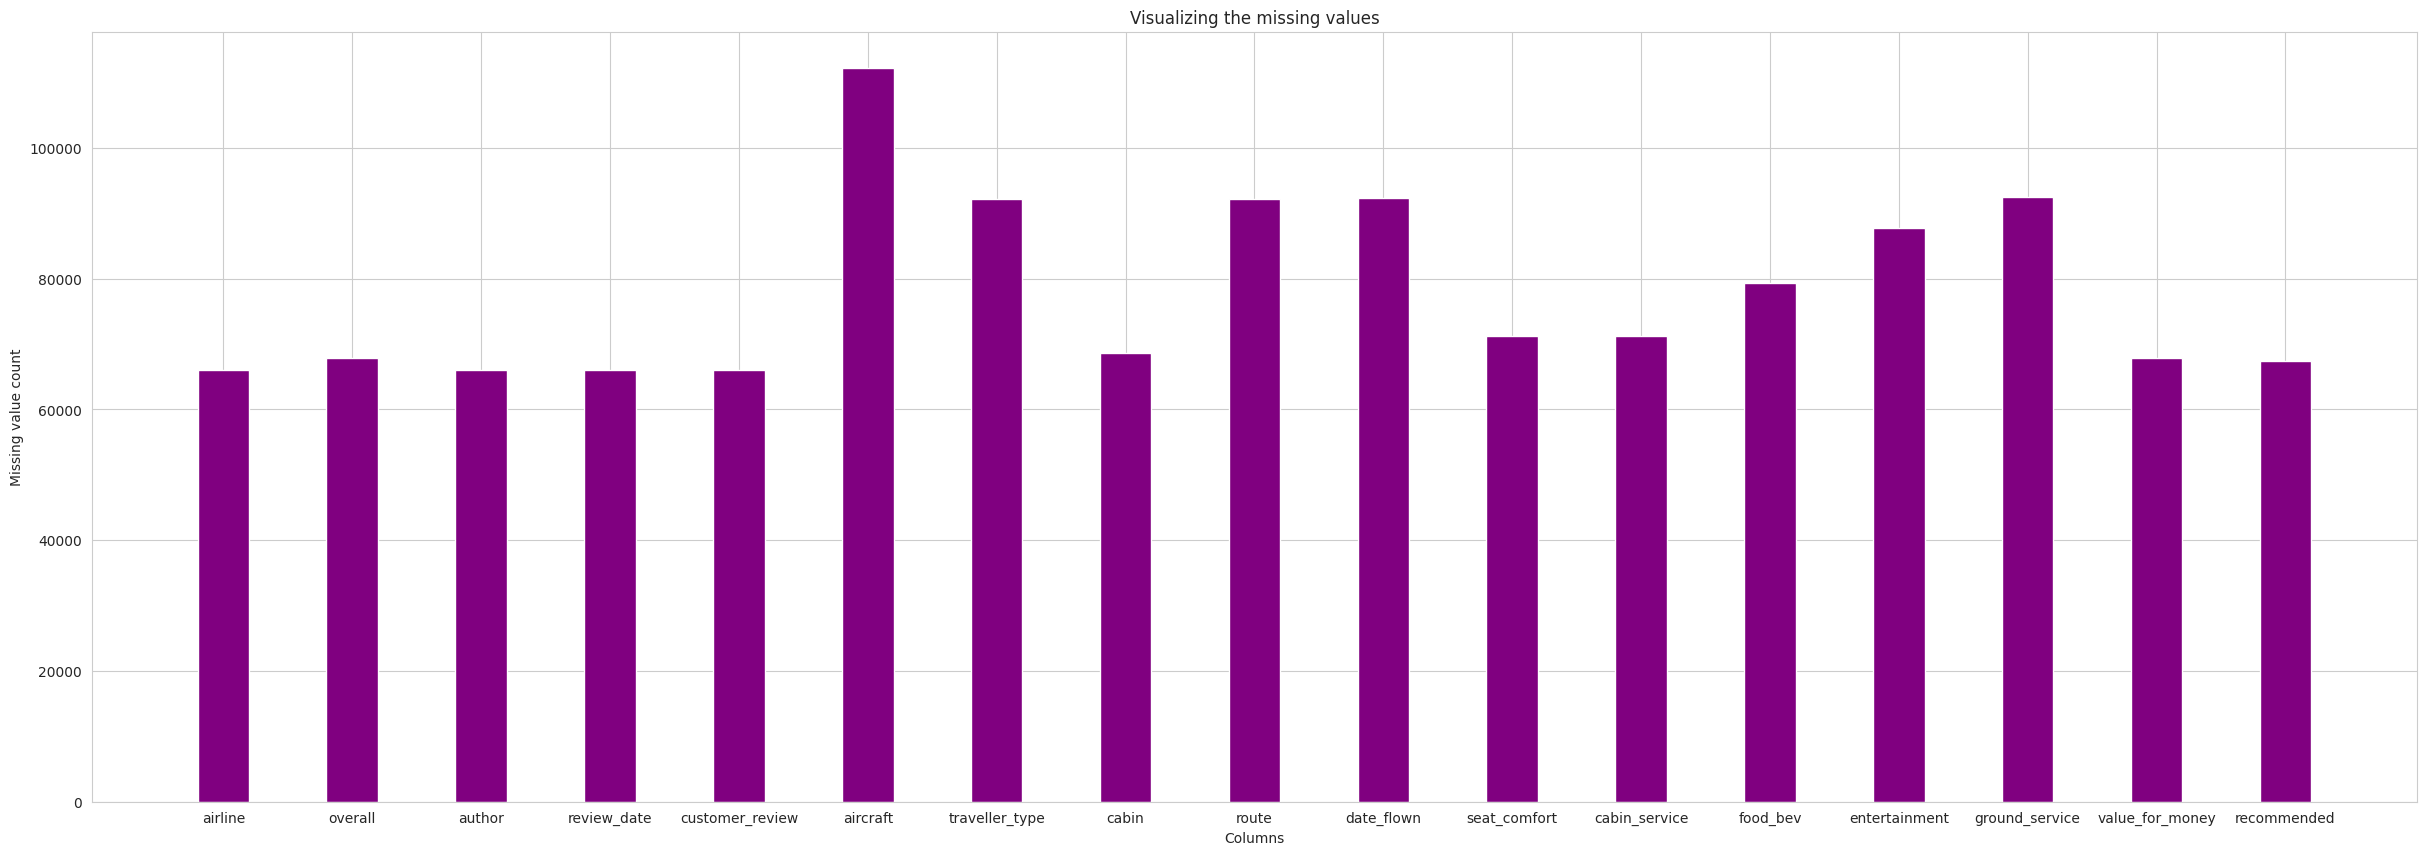

In [121]:
# Visualizing the missing values
courses = list(airline_df.columns)
values = list(airline_df.isnull().sum())
fig = plt.figure(figsize = (30, 10))
plt.bar(courses, values, color ='purple',
        width = 0.4)
plt.xlabel("Columns")
plt.ylabel("Missing value count")
plt.title("Visualizing the missing values")
plt.show()

### What did you know about your dataset?

The dataset has around 131895 rows and 17 columns. The data is in such form that after each row there is a blank row. Apart from that there many NaN values in each variable and there might be duplicate rows. We need to clean this data in order to make it ready for Exploratory Data Analysis.

## ***2. Understanding Your Variables***

In [122]:
# Dataset Columns
airline_df.columns

Index(['airline', 'overall', 'author', 'review_date', 'customer_review',
       'aircraft', 'traveller_type', 'cabin', 'route', 'date_flown',
       'seat_comfort', 'cabin_service', 'food_bev', 'entertainment',
       'ground_service', 'value_for_money', 'recommended'],
      dtype='object')

In [123]:
# Dataset Describe
airline_df.describe()

,overall,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money
count,64017.000000,60681.000000,60715.000000,52608.000000,44193.000000,39358.000000,63975.000000
mean,5.145430,2.952160,3.191814,2.908170,2.863372,2.692820,2.943962
std,3.477532,1.441362,1.565789,1.481893,1.507262,1.612215,1.587370
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000
50%,5.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,9.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000
max,10.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


### Variables Description 


1.  **airline:** Name of the airline.
2.  **overall:** Overall points are given to the trip between 0 & 10.
3.  **author:** Author of the trip
4.  **review_date:** Date of the Review 
5.  **customer_review:** Reviews given by customers about the flight experience.
6.  **aircraft:** Type of the aircraft
7.  **traveller_type:** Type of traveler (e.g. business, leisure) 
8.  **cabin:** Cabin type (e.g. Economy Class, Business Class, Premium Economy or First Class)
9.  **route:** The travel from and to destination of the customer.
10. **date_flown:** Date of the flight
11. **seat_comfort:** Rated between 1-5
12. **cabin_service:** Rated between 1-5
13. **food_bev:** Rated between 1-5 
14. **entertainment:** Rated between 1-5
15. **ground_service:** Rated between 1-5
16. **value_for_money:** Rated between 1-5
17. **recommended:** Referred to friend(Yes or No)

## 3. ***Data Wrangling***

### Data Wrangling Code

In [124]:
# Make Dataset ready for EDA
airline_df.duplicated().sum()

70711

In [125]:
#droping the null values
airline_df.drop_duplicates(inplace = True)

In [126]:
airline_df = airline_df.drop([0])

In [127]:
airline_df.isnull().sum()

airline                0
overall             1782
author                 0
review_date            0
customer_review        0
aircraft           42695
traveller_type     23643
cabin               2478
route              23670
date_flown         23749
seat_comfort        4972
cabin_service       4943
food_bev           12842
entertainment      20953
ground_service     24014
value_for_money     1856
recommended         1422
dtype: int64

In [128]:
# Unique value counts for each variable
for column in airline_df.columns:
    print(f"{column}: {airline_df[column].nunique()}")

airline: 81
overall: 10
author: 44069
review_date: 3015
customer_review: 61172
aircraft: 2088
traveller_type: 4
cabin: 4
route: 24549
date_flown: 63
seat_comfort: 5
cabin_service: 5
food_bev: 5
entertainment: 5
ground_service: 5
value_for_money: 5
recommended: 2


In [129]:
# Dropping unwanted columns
airline_df.drop(columns=['aircraft','route','author','customer_review'],axis=1,inplace=True)

### What all manipulations have you done and insights you found?

The data manipulation involved the removal of duplicates to ensure the data is clean and unique. The blank rows were dropped to avoid missing values that could interfere with data analysis. And finally the unwanted columns were dropped. Following are the reasons for dropping these columns:

1. aircraft - It has 42695 NaN values which is around 70% of all values.
2. route - It has 24549 unique values which is around 40% of all values.
3. author - It has 44069 unique values which is around 72% of all values.
4. customer_review - It has 61172 unique values which is around 99% of all values.

Columns with high number of NaN and unique values are very difficult for Exploratory Data Analysis. High percentage of missing values may not be useful for analysis because they lack sufficient data to draw conclusions from. Imputing or filling in missing values can be problematic and lead to biased results. High number of unique values may not provide meaningful insights or patterns. So dropping these types of columns is the best option.

In [130]:
airline_df.head()

,airline,overall,review_date,traveller_type,cabin,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
1,Turkish Airlines,7.0,8th May 2019,Business,Economy Class,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,2.0,4.0,yes
3,Turkish Airlines,2.0,7th May 2019,Family Leisure,Economy Class,2019-05-01 00:00:00,4.0,1.0,1.0,1.0,1.0,1.0,no
5,Turkish Airlines,3.0,7th May 2019,Business,Economy Class,2019-05-01 00:00:00,1.0,4.0,1.0,3.0,1.0,2.0,no
7,Turkish Airlines,10.0,6th May 2019,Solo Leisure,Economy Class,April 2019,4.0,5.0,5.0,5.0,5.0,5.0,yes
9,Turkish Airlines,1.0,6th May 2019,Solo Leisure,Economy Class,2019-05-01 00:00:00,1.0,1.0,1.0,1.0,1.0,1.0,no


In [131]:
airline_df.shape

(61183, 13)

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [55]:
top_10_airlines = airline_df['airline'].value_counts().head(10)
top_10_airlines = top_10_airlines.reset_index()
top_10_airlines.columns = ['airline', 'count']

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Spirit Airlines'),
  Text(1, 0, 'American Airlines'),
  Text(2, 0, 'United Airlines'),
  Text(3, 0, 'British Airways'),
  Text(4, 0, 'Emirates'),
  Text(5, 0, 'China Southern Airlines'),
  Text(6, 0, 'Frontier Airlines'),
  Text(7, 0, 'Ryanair'),
  Text(8, 0, 'Delta Air Lines'),
  Text(9, 0, 'Turkish Airlines')])

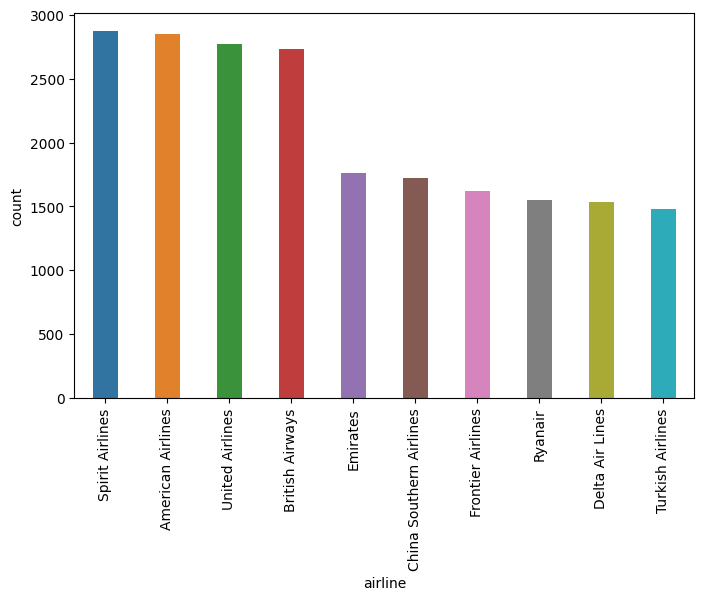

In [56]:
# Chart - 1 visualization code
plt.subplots(figsize=(8, 5))
sns.barplot(x='airline', y='count', data=top_10_airlines, width = 0.4)
plt.xticks(rotation=90)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 2

In [57]:
airline_df['recommended'].value_counts()

no     31268
yes    28493
Name: recommended, dtype: int64

<Axes: xlabel='recommended', ylabel='count'>

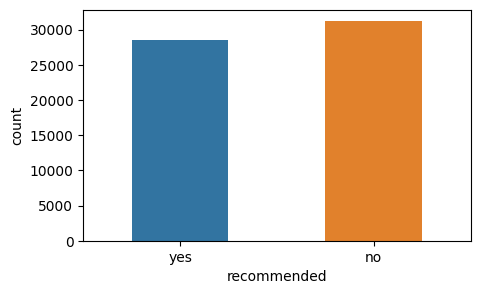

In [58]:
# Chart - 2 visualization code
plt.subplots(figsize=(5, 3))
sns.countplot(x='recommended', data=airline_df, width = 0.5)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 3

In [59]:
airline_df['traveller_type'].value_counts()

Solo Leisure      13935
Couple Leisure     9699
Family Leisure     7142
Business           6764
Name: traveller_type, dtype: int64

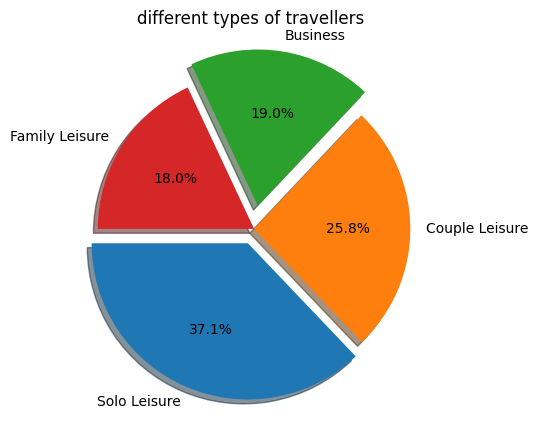

In [60]:
# Chart - 3 visualization code
labels = 'Solo Leisure' , 'Couple Leisure' , 'Business' , 'Family Leisure'
sizes = airline_df.traveller_type.value_counts()
explode = (0.1, 0.0 , 0.15 , 0.0)
plt.pie(sizes, explode=explode, labels=labels, 
        autopct='%1.1f%%',shadow=True,  startangle=180)
plt.axis('equal')
plt.title("different types of travellers")
plt.plot()
fig=plt.gcf()
fig.set_size_inches(5,5)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 4

<Axes: xlabel='traveller_type', ylabel='count'>

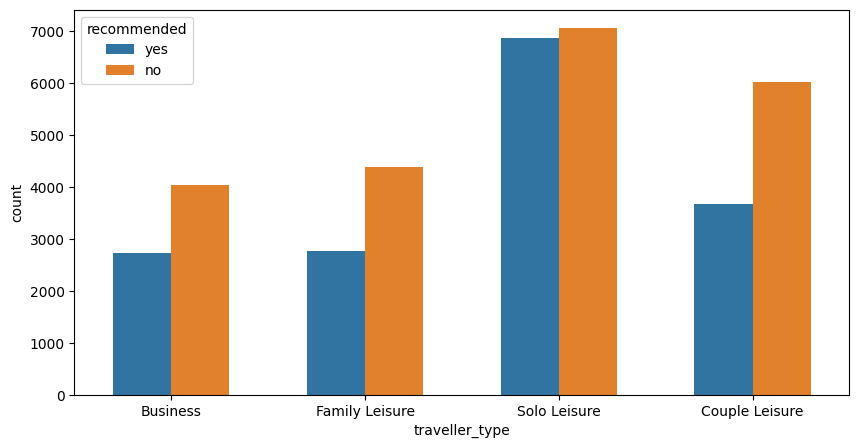

In [61]:
# Chart - 4 visualization code
plt.figure(figsize=(10,5))
sns.countplot(x=airline_df['traveller_type'],hue=airline_df['recommended'], width = 0.6)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 5

In [62]:
airline_df['cabin'].value_counts()

Economy Class      45171
Business Class      9590
Premium Economy     2412
First Class         1532
Name: cabin, dtype: int64

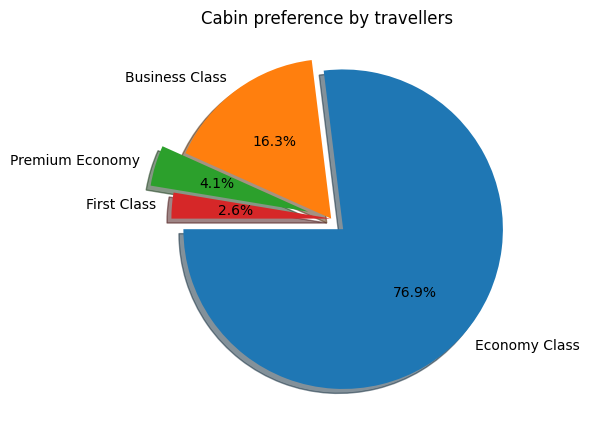

In [63]:
# Chart - 5 visualization code
labels = 'Economy Class' , 'Business Class' , 'Premium Economy' , 'First Class'
sizes = airline_df.cabin.value_counts()
explode = (0.1, 0.0 , 0.15 , 0.0)
plt.pie(sizes, explode=explode, labels=labels, 
        autopct='%1.1f%%',shadow=True,  startangle=180)
plt.axis('equal')
plt.title("Cabin preference by travellers")
plt.plot()
fig=plt.gcf()
fig.set_size_inches(5,5)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 6

<Axes: xlabel='cabin', ylabel='count'>

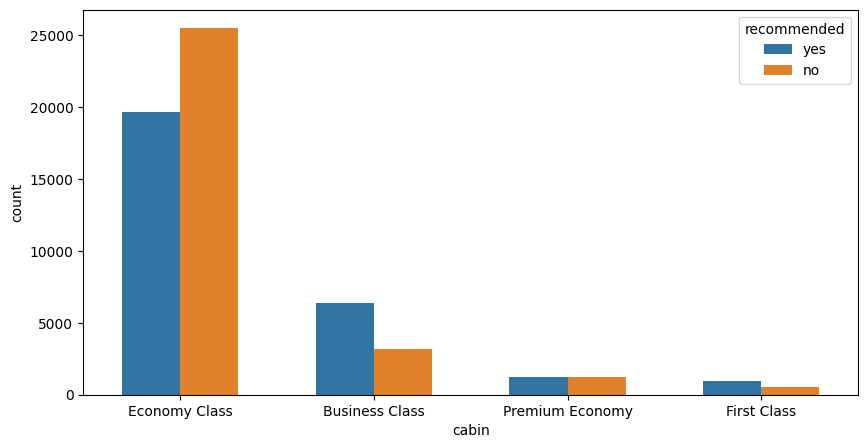

In [64]:
# Chart - 6 visualization code
plt.figure(figsize=(10,5))
sns.countplot(x=airline_df['cabin'],hue=airline_df['recommended'], width = 0.6)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 7

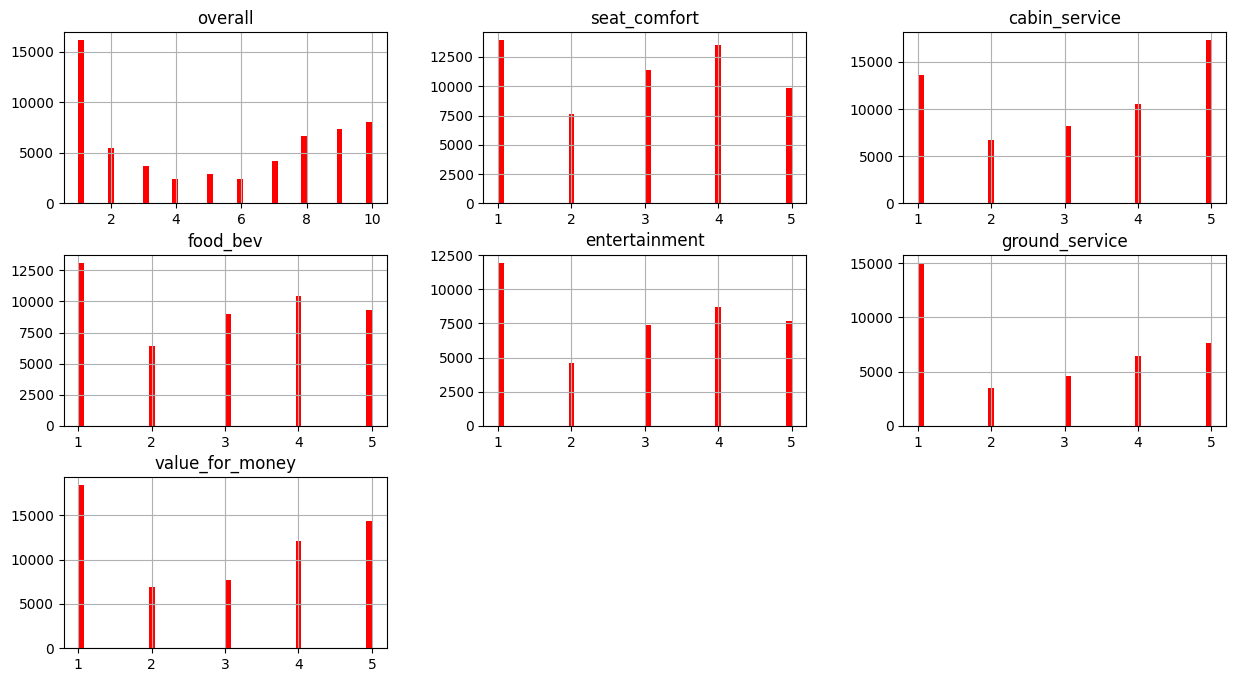

In [65]:
# Chart - 7 visualization code
airline_df.hist(bins=50, figsize=(15,8),color = 'red')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 8 - Pair Plot 

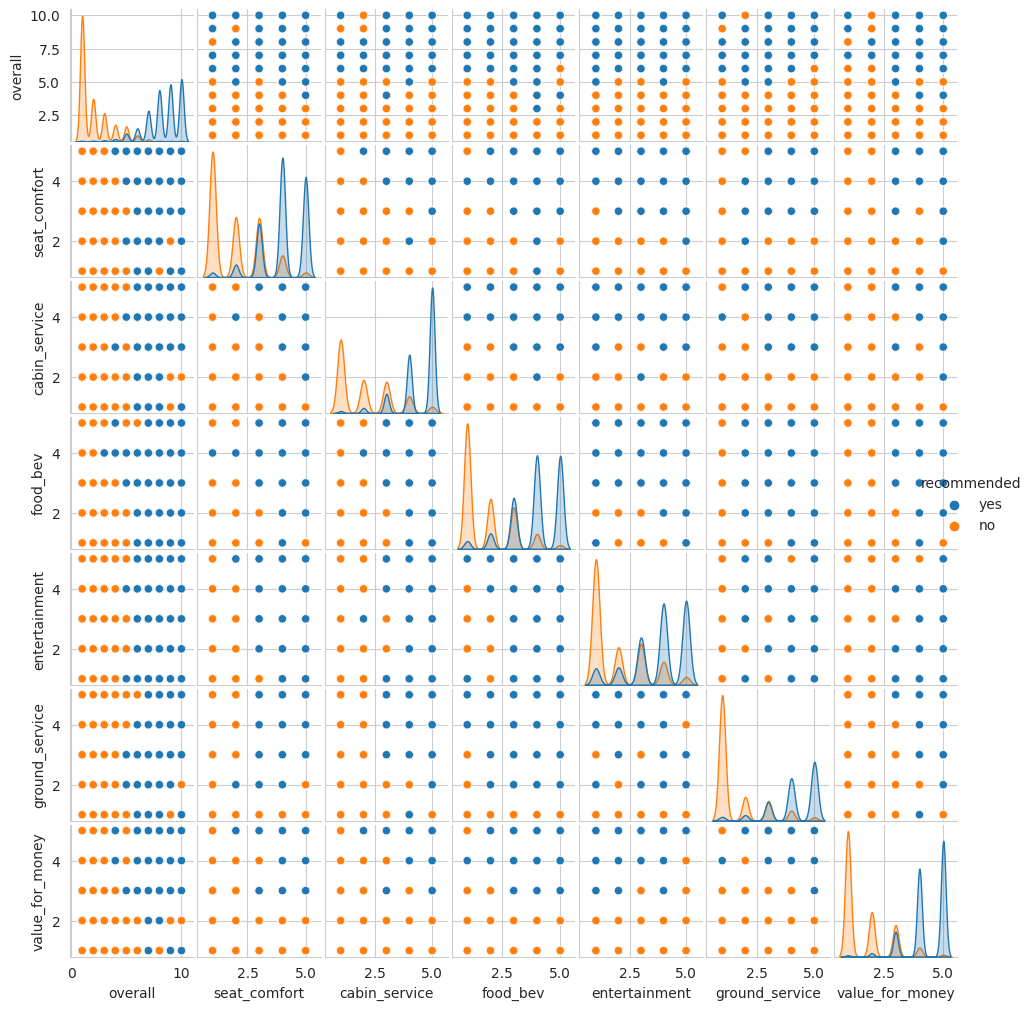

In [66]:
# Pair Plot visualization code
sns.set_style("whitegrid", {'axes.grid' : True})
pp=sns.pairplot(airline_df,hue='recommended')
pp.fig.set_size_inches(10,10);

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 9 - Correlation Heatmap

<ipython-input-67-30ed07108fb0>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = airline_df.corr()


<Axes: >

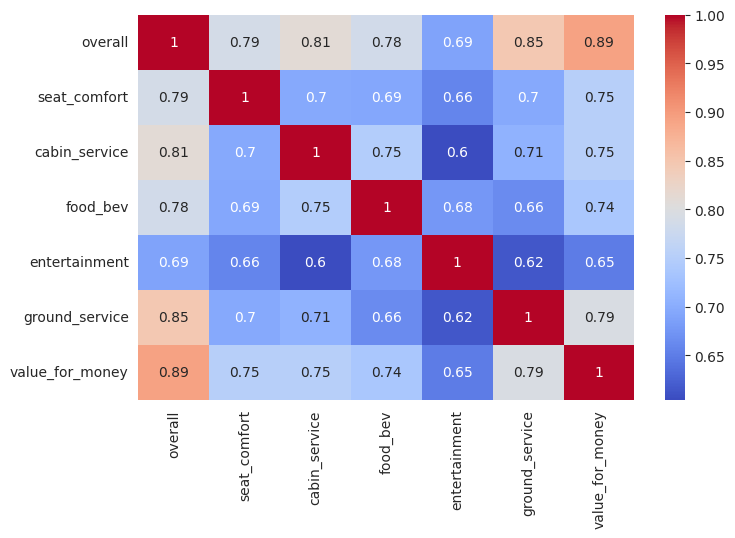

In [67]:
# Correlation Heatmap visualization code
plt.figure(figsize=(8,5))
correlation = airline_df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 10

<Axes: xlabel='cabin', ylabel='overall'>

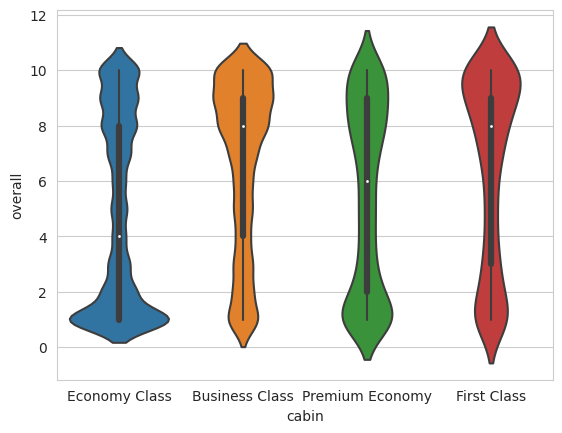

In [71]:
# Chart - 10 visualization code
sns.violinplot(x="cabin", y="overall",hue=None, data=airline_df)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 11

<Axes: xlabel='traveller_type', ylabel='overall'>

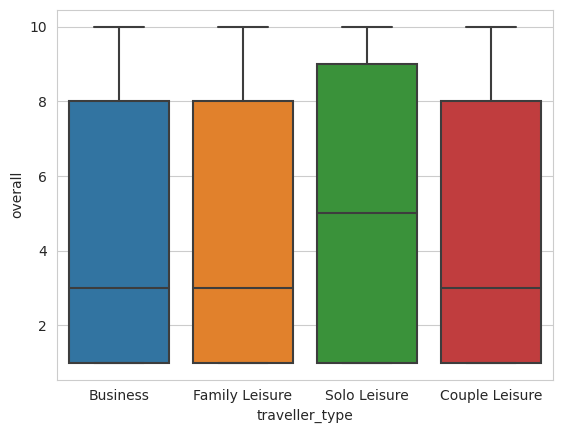

In [72]:
# Chart - 11 visualization code
sns.boxplot(x="traveller_type", y="overall", data=airline_df)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 12

In [132]:
# Chart - 12 visualization code
airline_df['date_flown']=pd.to_datetime(airline_df['date_flown'])
airline_df['Year'] = airline_df['date_flown'].apply(lambda x: x.year)
airline_df['Month'] = airline_df['date_flown'].apply(lambda x: x.month)
airline_df['Day'] = airline_df['date_flown'].apply(lambda x: x.day)

In [133]:
data_by_year = airline_df.groupby('Year')['airline'].count()

<Axes: xlabel='Year'>

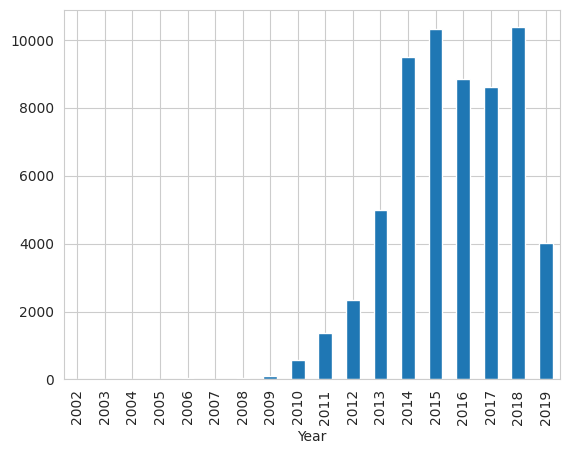

In [75]:
data_by_year.plot(kind='bar')

<Axes: xlabel='Month'>

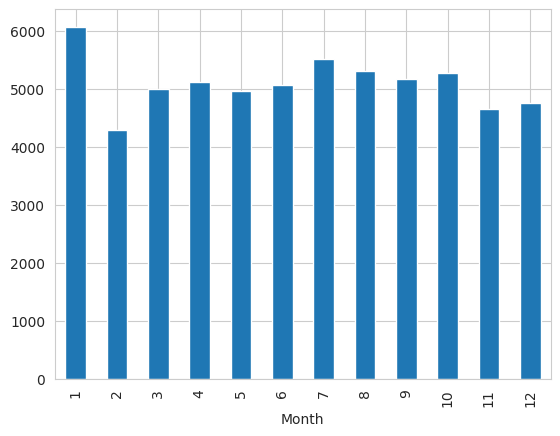

In [76]:
data_by_month = airline_df.groupby('Month')['airline'].count()
data_by_month.plot(kind='bar')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 13

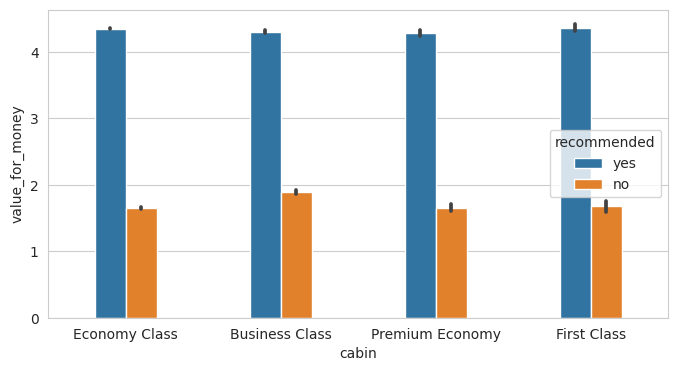

In [77]:
# Chart - 13 visualization code
plt.figure(figsize=(8,4))
cabin_ = sns.barplot(x=airline_df['cabin'],y=airline_df['value_for_money'], hue=airline_df['recommended'], width = 0.4)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 14

In [ ]:
# Chart - 14 visualization code


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15

In [ ]:
# Chart - 15 visualization code


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [134]:
# Handling Missing Values & Missing Value Imputation
# Dropping all rows which has NaN values in recommended columns
airline_df.dropna(subset=['recommended'],inplace=True)

In [135]:
# Dropping these columns because it can introduce bias and affect the performance of the model
airline_df.drop(columns=['airline','date_flown','review_date','Year','Month','Day'],axis=1,inplace=True)

In [136]:
airline_df['traveller_type'].fillna(method="ffill",inplace=True)
airline_df['cabin'].fillna(method="ffill",inplace=True)

In [137]:
from sklearn.impute import KNNImputer

missing_cols = ['overall', 'seat_comfort', 'cabin_service','food_bev','entertainment','ground_service','value_for_money']
imputer = KNNImputer(n_neighbors=5)
airline_df[missing_cols] = imputer.fit_transform(airline_df[missing_cols])

In [138]:
airline_df.isnull().sum()

overall            0
traveller_type     0
cabin              0
seat_comfort       0
cabin_service      0
food_bev           0
entertainment      0
ground_service     0
value_for_money    0
recommended        0
dtype: int64

In [139]:
airline_df.head()

,overall,traveller_type,cabin,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
1,7.0,Business,Economy Class,4.0,5.0,4.0,4.0,2.0,4.0,yes
3,2.0,Family Leisure,Economy Class,4.0,1.0,1.0,1.0,1.0,1.0,no
5,3.0,Business,Economy Class,1.0,4.0,1.0,3.0,1.0,2.0,no
7,10.0,Solo Leisure,Economy Class,4.0,5.0,5.0,5.0,5.0,5.0,yes
9,1.0,Solo Leisure,Economy Class,1.0,1.0,1.0,1.0,1.0,1.0,no


In [140]:
airline_df.shape

(59761, 10)

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Remove Multicolinearity variables

In [141]:
# Remove Multicolinearity variables
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = airline_df.drop(columns=['traveller_type', 'cabin','recommended'])

vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF Score"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [142]:
print(vif)

          Features  VIF Score
0          overall  20.956718
1     seat_comfort  15.084082
2    cabin_service  16.482126
3         food_bev  16.953086
4    entertainment  12.326313
5   ground_service  18.707425
6  value_for_money  22.893413


##### 

Answer Here.

### 3. Categorical Encoding

In [143]:
# Encode your categorical columns
# Create dummy variables for the catgeorical variable State of traveller_type
airline_df['TT_Solo_Leisure'] = np.where(airline_df['traveller_type']=='Solo Leisure', 1, 0)
airline_df['TT_Couple_Leisure'] = np.where(airline_df['traveller_type']=='Couple Leisure', 1, 0)
airline_df['TT_Business'] = np.where(airline_df['traveller_type']=='Business', 1, 0)
airline_df['TT_Family_Leisure'] = np.where(airline_df['traveller_type']=='Family Leisure', 1, 0)

# Drop the original column State from the dataframe
airline_df.drop(columns=['traveller_type'],axis=1,inplace=True)

In [144]:
# Create dummy variables for the catgeorical variable State of cabin
airline_df['C_Economy Class'] = np.where(airline_df['cabin']=='Economy Class', 1, 0)
airline_df['C_Business Class'] = np.where(airline_df['cabin']=='Business Class', 1, 0)
airline_df['C_Premium Economy'] = np.where(airline_df['cabin']=='Premium Economy', 1, 0)
airline_df['C_First Class'] = np.where(airline_df['cabin']=='First Class', 1, 0)

# Drop the original column State from the dataframe
airline_df.drop(columns=['cabin'],axis=1,inplace=True)

In [145]:
#converting targeted column
airline_df['recommended'].replace({'yes':1,'no':0},inplace=True)

In [146]:
airline_df.head()

,overall,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended,TT_Solo_Leisure,TT_Couple_Leisure,TT_Business,TT_Family_Leisure,C_Economy Class,C_Business Class,C_Premium Economy,C_First Class
1,7.0,4.0,5.0,4.0,4.0,2.0,4.0,1,0,0,1,0,1,0,0,0
3,2.0,4.0,1.0,1.0,1.0,1.0,1.0,0,0,0,0,1,1,0,0,0
5,3.0,1.0,4.0,1.0,3.0,1.0,2.0,0,0,0,1,0,1,0,0,0
7,10.0,4.0,5.0,5.0,5.0,5.0,5.0,1,1,0,0,0,1,0,0,0
9,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0,1,0,0,0,1,0,0,0


#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

## ***6. Splitting the data for training and testing***

In [147]:
import warnings
import numpy as np
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X=airline_df.drop('recommended',axis=1)
y=airline_df['recommended']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=1)

## ***7. ML Model Implementation***

### ML Model - 1

In [148]:
# ML Model - 1 Implementation
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,precision_score,recall_score,f1_score

# Fit the Algorithm
lr = LogisticRegression()
lr.fit(X_train,y_train)

train_score_1 = lr.score(X_train,y_train)
test_score_1 = lr.score(X_test,y_test)

print("Training Accuracy", train_score_1)
print("Testing Accuracy",test_score_1)

# Predict on the model
y_pred_1 = lr.predict(X_test)

Training Accuracy 0.9578313253012049
Testing Accuracy 0.9528988538442232


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [151]:
# Visualizing evaluation Metric Score chart
from sklearn.model_selection import cross_val_score
scoreslr = cross_val_score(lr,X_train,y_train,cv=10)
print('Average Accuracy',np.mean(scoreslr))

Average Accuracy 0.9578104622638948


In [152]:
print('Confusion Matrix \n',confusion_matrix(y_test,y_pred_1))

Confusion Matrix 
 [[6074  296]
 [ 267 5316]]


In [153]:
print('LR_Report \n',classification_report(y_test, y_pred_1))

LR_Report 
               precision    recall  f1-score   support

           0       0.96      0.95      0.96      6370
           1       0.95      0.95      0.95      5583

    accuracy                           0.95     11953
   macro avg       0.95      0.95      0.95     11953
weighted avg       0.95      0.95      0.95     11953



#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***